### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import seed
from scipy.stats import shapiro

### Get data

In [5]:
all_df = pd.read_csv('data_folder/data/all_data.csv').set_index('date')
all_df

nonfarm_payroll  payroll_delta_1m  payroll_delta_3m  \
date                                                              
1939-01-01          29923.0               NaN               NaN   
1939-02-01          30100.0          0.591518               NaN   
1939-03-01          30280.0          0.598007               NaN   
1939-04-01          30094.0         -0.614267          0.571467   
1939-05-01          30299.0          0.681199          0.661130   
...                     ...               ...               ...   
2021-11-01         148652.0          0.437147          1.189893   
2021-12-01         149240.0          0.395555          1.297785   
2022-01-01         149744.0          0.337711          1.174960   
2022-02-01         150494.0          0.500855          1.239136   
2022-03-01         150925.0          0.286390          1.129054   

            payroll_delta_6m  payroll_delta_12m  payroll_diff_12m_1m  \
date                                                                   
1939-01-01               NaN                NaN                  NaN   
1939-02-01               NaN                NaN                  NaN   
1939-03-01               NaN                NaN                  NaN   
1939-04-01               NaN                NaN                  NaN   
1939-05-01               NaN                NaN                  NaN   
...                      ...                ...                  ...   
2021-11-01          2.419027           4.235268             3.798120   
2021-12-01          2.431056           4.732029             4.336475   
2022-01-01          2.293236           4.703637             4.365926   
2022-02-01          2.443773           4.708232             4.207377   
2022-03-01          2.441491           4.496265             4.209874   

            payroll_diff_12m_3m  payroll_diff_12m_6m  policy_rate  \
date                                                                
1939-01-01                  NaN                  NaN          NaN   
1939-02-01                  NaN                  NaN          NaN   
1939-03-01                  NaN                  NaN          NaN   
1939-04-01                  NaN                  NaN          NaN   
1939-05-01                  NaN                  NaN          NaN   
...                         ...                  ...          ...   
2021-11-01             3.045375             1.816241         0.08   
2021-12-01             3.434245             2.300973         0.08   
2022-01-01             3.528676             2.410400         0.08   
2022-02-01             3.469096             2.264459         0.08   
2022-03-01             3.367211             2.054774         0.20   

            policy_rate_1m_ago  ...        sp500  sp500_delta_1m  \
date                            ...                                
1939-01-01                 NaN  ...    12.300000       -6.392695   
1939-02-01                 NaN  ...    12.700000        3.252029   
1939-03-01                 NaN  ...    10.980000      -13.543309   
1939-04-01                 NaN  ...    10.930000       -0.455366   
1939-05-01                 NaN  ...    11.600000        6.129918   
...                        ...  ...          ...             ...   
2021-11-01                0.08  ...  4567.000000       -0.833371   
2021-12-01                0.08  ...  4766.180176        4.361291   
2022-01-01                0.08  ...  4515.549805       -5.258517   
2022-02-01                0.08  ...  4373.939941       -3.136049   
2022-03-01                0.08  ...  4530.410156        3.577329   

            sp500_delta_3m  sp500_delta_6m  sp500_delta_12m   vol_30d  \
date                                                                    
1939-01-01       -6.605922       -0.243307        15.060811  1.846643   
1939-02-01       -0.235662        5.306794        11.992942  1.868115   
1939-03-01      -16.438362      -10.294120        29.176465  1.755651   
1939-04-01      -11.138210      -17.008350        11.75

In [206]:
# In experiment 1342, features used are:
features = ['payroll_diff_12m_3m',
             'policy_rate_delta_6m',
             'CPI_delta_12m',
             'yield_10y_delta12m',
             'yield_spread',
             'sp500_delta_12m',
             'vol_30d']


In [207]:
X = all_df[features].copy().dropna()
X

payroll_diff_12m_3m  policy_rate_delta_6m  CPI_delta_12m  \
date                                                                   
1955-01-01            -1.077372                  0.59      -0.631032   
1955-02-01            -0.412915                  0.07      -0.629863   
1955-03-01             0.358496                  0.28      -0.519866   
1955-04-01             0.654377                  0.58      -0.260611   
1955-05-01             1.410951                  0.60      -0.594133   
...                         ...                   ...            ...   
2021-11-01             3.045375                  0.02       6.828372   
2021-12-01             3.434245                  0.00       7.096542   
2022-01-01             3.528676                 -0.02       7.525934   
2022-02-01             3.469096                 -0.01       7.912024   
2022-03-01             3.367211                  0.12       8.557586   

            yield_10y_delta12m  yield_spread  sp500_delta_12m   vol_30d  
date                                                                     
1955-01-01                0.13          1.39        40.452458  1.029941  
1955-02-01                0.18          1.48        40.573609  0.727032  
1955-03-01                0.31          1.40        35.783226  0.936469  
1955-04-01                0.46          1.16        34.324129  0.572632  
1955-05-01                0.39          1.31        29.873241  0.593385  
...                        ...           ...              ...       ...  
2021-11-01                0.69          1.51        26.103444  0.729942  
2021-12-01                0.54          1.41        26.892739  1.112502  
2022-01-01                0.68          1.61        21.573991  1.122077  
2022-02-01                0.67          1.60        14.766935  1.390119  
2022-03-01                0.52          1.69        14.033116  1.486786  

[807 rows x 7 columns]

### Check the pairwise relationship of each feature

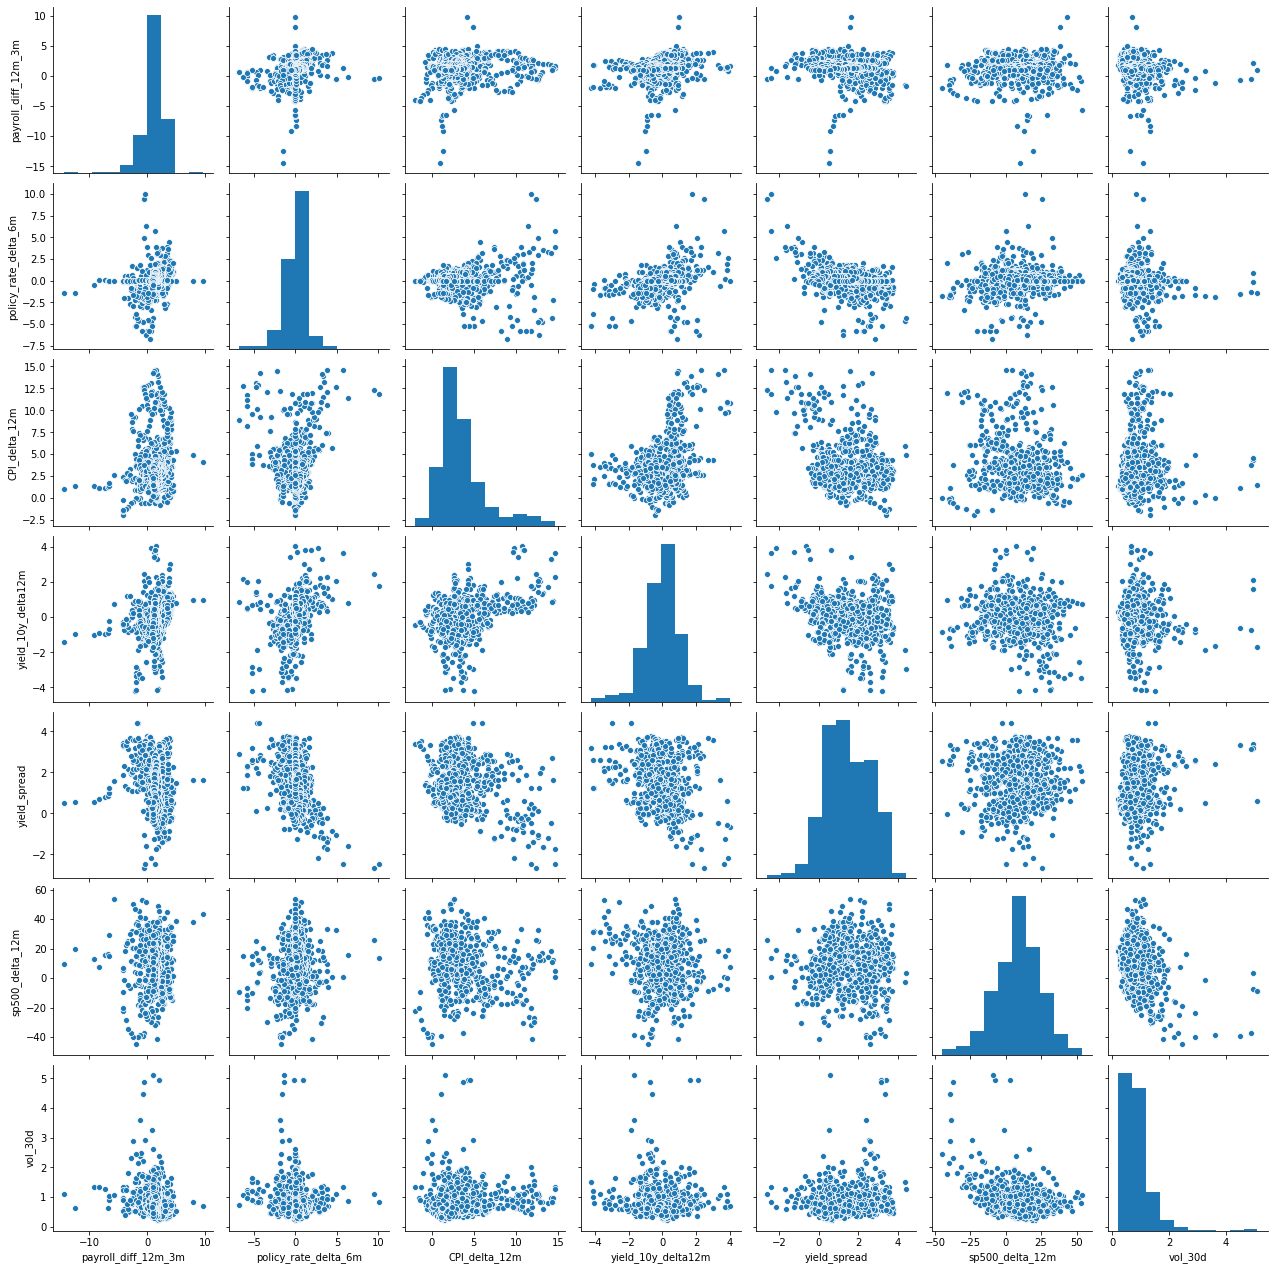

In [208]:
sns.pairplot(X)

### Plot distribution of each feature

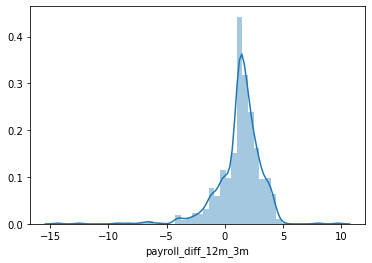

In [210]:
sns.distplot(X['payroll_diff_12m_3m'])

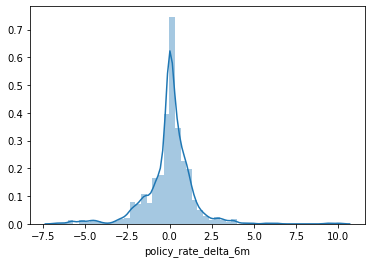

In [211]:
sns.distplot(X['policy_rate_delta_6m'])

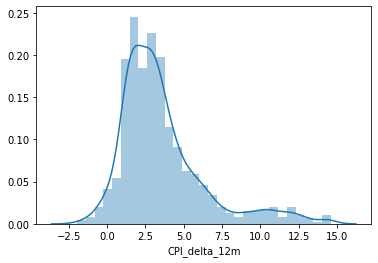

In [212]:
sns.distplot(X['CPI_delta_12m'])

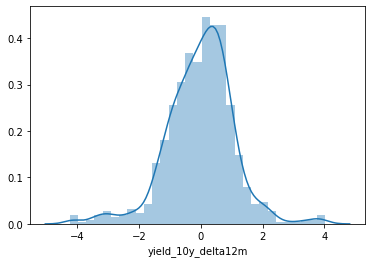

In [213]:
sns.distplot(X['yield_10y_delta12m'])


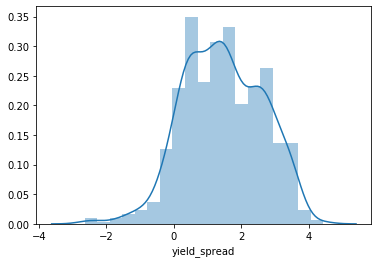

In [214]:
sns.distplot(X['yield_spread'])

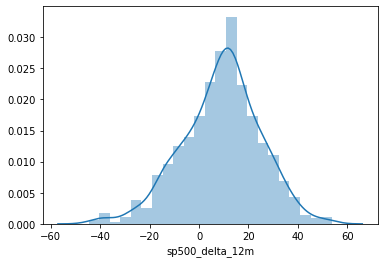

In [215]:
sns.distplot(X['sp500_delta_12m'])

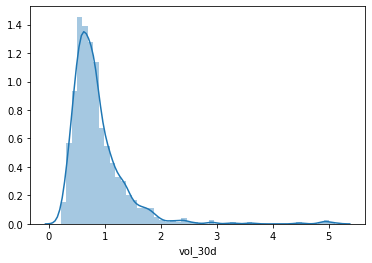

In [216]:
sns.distplot(X['vol_30d'])

### Check if feature is Normally distributed

In [217]:
def check_normality(data):
    # normality test
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

for fea in X.columns:
    print(f'For feature {fea}, the normality test result is:')
    check_normality(X[fea])
    print(" ")

For feature payroll_diff_12m_3m, the normality test result is:
Statistics=0.857, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature policy_rate_delta_6m, the normality test result is:
Statistics=0.866, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature CPI_delta_12m, the normality test result is:
Statistics=0.861, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature yield_10y_delta12m, the normality test result is:
Statistics=0.965, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature yield_spread, the normality test result is:
Statistics=0.988, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature sp500_delta_12m, the normality test result is:
Statistics=0.993, p=0.001
Sample does not look Gaussian (reject H0)
 
For feature vol_30d, the normality test result is:
Statistics=0.706, p=0.000
Sample does not look Gaussian (reject H0)
 


- Using Normality Test: we can see that none of the feature is Normally Distributed

In [218]:
def distribution_transformation(transform_type, data):
    print(f'Transformation type is: {transform_type}')
    if transform_type == 'inverse_cube':
        transformed_col = data ** (-3)
    elif transform_type == 'inverse_square':
        transformed_col = data ** (-2)
    elif transform_type == 'inverse':
        transformed_col = data ** (-1)
    elif transform_type == 'inverse_square_root':
        transformed_col = data ** (-0.5)
    elif transform_type == 'log':
        transformed_col = np.log(data)
    elif transform_type == 'square_root':
        transformed_col = np.sqrt(data)
    elif transform_type == 'no_transformation':
        transformed_col = data
    elif transform_type == 'square':
        transformed_col = np.square(data)
    elif transform_type == 'cube':
        transformed_col = data ** 3
    # Check normality
    check_normality(transformed_col)
    print(" ")
    return transformed_col

In [219]:
transformation_type = ['inverse_cube', 'inverse_square', 'inverse', 'inverse_square_root',
                       'log', 'square_root', 'no_transformation', 'square', 'cube']

### Payroll

In [220]:
X['payroll_diff_12m_3m'].min()

-14.406608203341996

In [222]:
# Since there is negative number in payroll, some of the transformation would not work
# Add 20 to all the data points so that all transformation can be applied

for ts_type in transformation_type:
    distribution_transformation(ts_type, X['payroll_diff_12m_3m'] + 20)

Transformation type is: inverse_cube
Statistics=0.088, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.213, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.455, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.590, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.706, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.794, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.857, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.925, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.946, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

### Policy rate

In [223]:
X['policy_rate_delta_6m'].min()

-6.730000000000002

In [224]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['policy_rate_delta_6m'] + 10)

Transformation type is: inverse_cube
Statistics=0.270, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.429, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.626, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.720, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.796, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.847, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.866, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.808, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.649, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

### CPI

In [225]:
X['CPI_delta_12m'].min()

-1.958761003762277

In [226]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['CPI_delta_12m'] + 10)

Transformation type is: inverse_cube
Statistics=0.946, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.981, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.977, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.961, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.935, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.901, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.861, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.767, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.667, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

### Yield 10y

In [228]:
X['yield_10y_delta12m'].min()

-4.24

In [230]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['yield_10y_delta12m'] + 10)

Transformation type is: inverse_cube
Statistics=0.672, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.780, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.871, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.906, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.934, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.953, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.965, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.965, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

### Yield Spread

In [231]:
X['yield_spread'].min()

-2.6500000000000004

In [232]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['yield_spread'] + 10)

Transformation type is: inverse_cube
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.919, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.957, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.970, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.979, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.985, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.988, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.987, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.978, p=0.000
Sample does not look Gaussian (reject H0)
 


### SP 500

In [233]:
X['sp500_delta_12m'].min()

-44.75624146772434

In [234]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['sp500_delta_12m'] + 100)

Transformation type is: inverse_cube
Statistics=0.683, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.803, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.899, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.935, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.962, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.981, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.993, p=0.001
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.996, p=0.021
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.976, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

### Vol

In [235]:
X['vol_30d'].min()

0.2088566473218682

In [236]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['vol_30d'])

Transformation type is: inverse_cube
Statistics=0.525, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.750, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.945, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.993, p=0.001
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.981, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.886, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.706, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.316, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.140, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

# Mehod1: Multi-variant Normal

Although none of them is strictly Normally Distributed, I assume they are jointly Multi-variant Normally Distributed, and simulate based on this assumption to see what happens

Since vol is always non-negative, I will do log transformation and assume the log(vol) is normmaly distributed



In [237]:
X_transformed = X.copy()
X_transformed['log_vol_30d'] = np.log(X_transformed['vol_30d'])
X_transformed = X_transformed.drop(columns=['vol_30d'])
X_transformed

payroll_diff_12m_3m  policy_rate_delta_6m  CPI_delta_12m  \
date                                                                   
1955-01-01            -1.077372                  0.59      -0.631032   
1955-02-01            -0.412915                  0.07      -0.629863   
1955-03-01             0.358496                  0.28      -0.519866   
1955-04-01             0.654377                  0.58      -0.260611   
1955-05-01             1.410951                  0.60      -0.594133   
...                         ...                   ...            ...   
2021-11-01             3.045375                  0.02       6.828372   
2021-12-01             3.434245                  0.00       7.096542   
2022-01-01             3.528676                 -0.02       7.525934   
2022-02-01             3.469096                 -0.01       7.912024   
2022-03-01             3.367211                  0.12       8.557586   

            yield_10y_delta12m  yield_spread  sp500_delta_12m  log_vol_30d  
date                                                                        
1955-01-01                0.13          1.39        40.452458     0.029502  
1955-02-01                0.18          1.48        40.573609    -0.318785  
1955-03-01                0.31          1.40        35.783226    -0.065639  
1955-04-01                0.46          1.16        34.324129    -0.557512  
1955-05-01                0.39          1.31        29.873241    -0.521912  
...                        ...           ...              ...          ...  
2021-11-01                0.69          1.51        26.103444    -0.314790  
2021-12-01                0.54          1.41        26.892739     0.106612  
2022-01-01                0.68          1.61        21.573991     0.115181  
2022-02-01                0.67          1.60        14.766935     0.329389  
2022-03-01                0.52          1.69        14.033116     0.396617  

[807 rows x 7 columns]

In [238]:
X_mean = X_transformed.mean()
X_mean

payroll_diff_12m_3m     1.256871
policy_rate_delta_6m   -0.006753
CPI_delta_12m           3.562388
yield_10y_delta12m     -0.011945
yield_spread            1.453371
sp500_delta_12m         8.953986
log_vol_30d            -0.263505
dtype: float64

In [239]:
X_cov = X_transformed.cov()
X_cov

payroll_diff_12m_3m  policy_rate_delta_6m  \
payroll_diff_12m_3m              3.740759              0.912966   
policy_rate_delta_6m             0.912966              2.148544   
CPI_delta_12m                    0.702504              0.326806   
yield_10y_delta12m               0.621461              0.641436   
yield_spread                    -0.596702             -0.744896   
sp500_delta_12m                  0.739396              2.597761   
log_vol_30d                     -0.195891             -0.091564   

                      CPI_delta_12m  yield_10y_delta12m  yield_spread  \
payroll_diff_12m_3m        0.702504            0.621461     -0.596702   
policy_rate_delta_6m       0.326806            0.641436     -0.744896   
CPI_delta_12m              7.817868            1.156008     -0.905374   
yield_10y_delta12m         1.156008            1.189549     -0.335879   
yield_spread              -0.905374           -0.335879      1.363591   
sp500_delta_12m           -8.555443           -2.032429      0.220581   
log_vol_30d                0.123984           -0.043702      0.049555   

                      sp500_delta_12m  log_vol_30d  
payroll_diff_12m_3m          0.739396    -0.195891  
policy_rate_delta_6m         2.597761    -0.091564  
CPI_delta_12m               -8.555443     0.123984  
yield_10y_delta12m          -2.032429    -0.043702  
yield_spread                 0.220581     0.049555  
sp500_delta_12m            253.599849    -2.292841  
log_vol_30d                 -2.292841     0.212332

In [240]:
# Simulate 2000 data points by assuming Multivariate Normal
multivariate_data = np.random.default_rng().multivariate_normal(X_mean, X_cov, 2000)
multivariate_data = pd.DataFrame(multivariate_data, columns=['payroll_diff_12m_3m',
                                                       'policy_rate_delta_6m',
                                                       'CPI_delta_12m',
                                                       'yield_10y_delta12m',
                                                       'yield_spread',
                                                       'sp500_delta_12m',
                                                       'log_vol_30d'])
multivariate_data


payroll_diff_12m_3m  policy_rate_delta_6m  CPI_delta_12m  \
0                0.622933             -0.766111       2.471816   
1                1.940195              2.190589       4.547962   
2               -1.153443             -0.798101       1.563412   
3                0.722146              1.437769       2.617401   
4               -3.105943             -0.854402       6.934629   
...                   ...                   ...            ...   
1995             1.765967              1.360849       1.370500   
1996             5.994599              0.439886       1.711620   
1997            -2.064023             -2.233542       2.174455   
1998             0.099926              3.419506       5.259525   
1999            -1.920766              0.230739       7.811779   

      yield_10y_delta12m  yield_spread  sp500_delta_12m  log_vol_30d  
0              -2.573348      1.438514        27.220864     0.414212  
1              -0.752053      2.175916        12.180011     0.204699  
2               0.487287      2.177907        27.910140     0.102257  
3               0.182980     -0.507315        32.073202    -0.041763  
4              -0.820495      0.602762        -1.065503     1.103336  
...                  ...           ...              ...          ...  
1995            0.937601      2.204974        23.625618    -0.426135  
1996            1.379493      2.443988        12.963436    -0.254511  
1997           -0.989094      3.109242        22.132673    -0.007432  
1998            1.629790     -0.427499         7.404876    -0.218301  
1999            1.065820      2.273581        25.802507     0.153701  

[2000 rows x 7 columns]

# Plot the simulated multivariate data & Compare with Original data

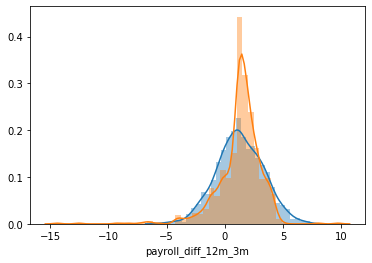

In [243]:
sns.distplot(multivariate_data['payroll_diff_12m_3m'])
sns.distplot(X['payroll_diff_12m_3m'])

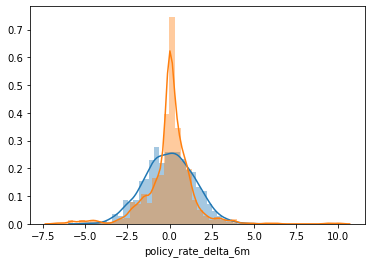

In [244]:
sns.distplot(multivariate_data['policy_rate_delta_6m'])
sns.distplot(X['policy_rate_delta_6m'])

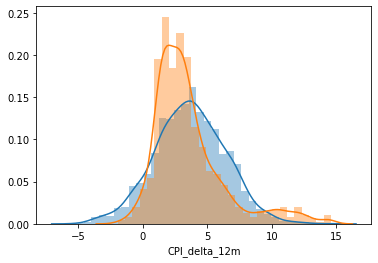

In [245]:
sns.distplot(multivariate_data['CPI_delta_12m'])
sns.distplot(X['CPI_delta_12m'])

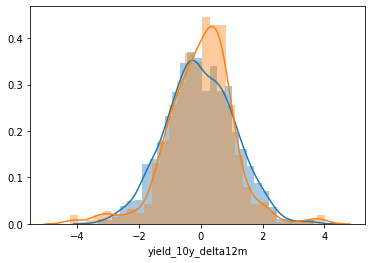

In [246]:
sns.distplot(multivariate_data['yield_10y_delta12m'])
sns.distplot(X['yield_10y_delta12m'])

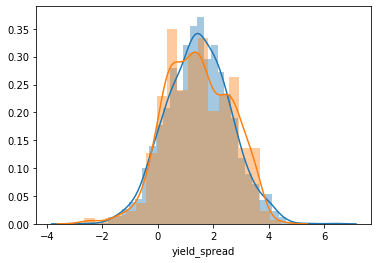

In [247]:
sns.distplot(multivariate_data['yield_spread'])
sns.distplot(X['yield_spread'])

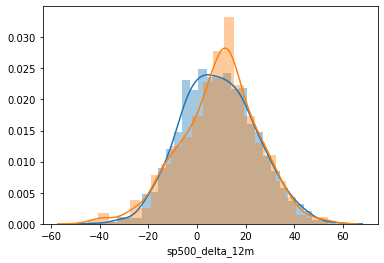

In [248]:
sns.distplot(multivariate_data['sp500_delta_12m'])
sns.distplot(X['sp500_delta_12m'])

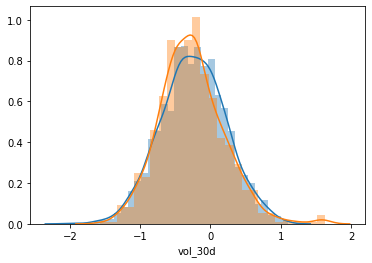

In [249]:
sns.distplot(multivariate_data['log_vol_30d'])
sns.distplot(np.log(X['vol_30d']))

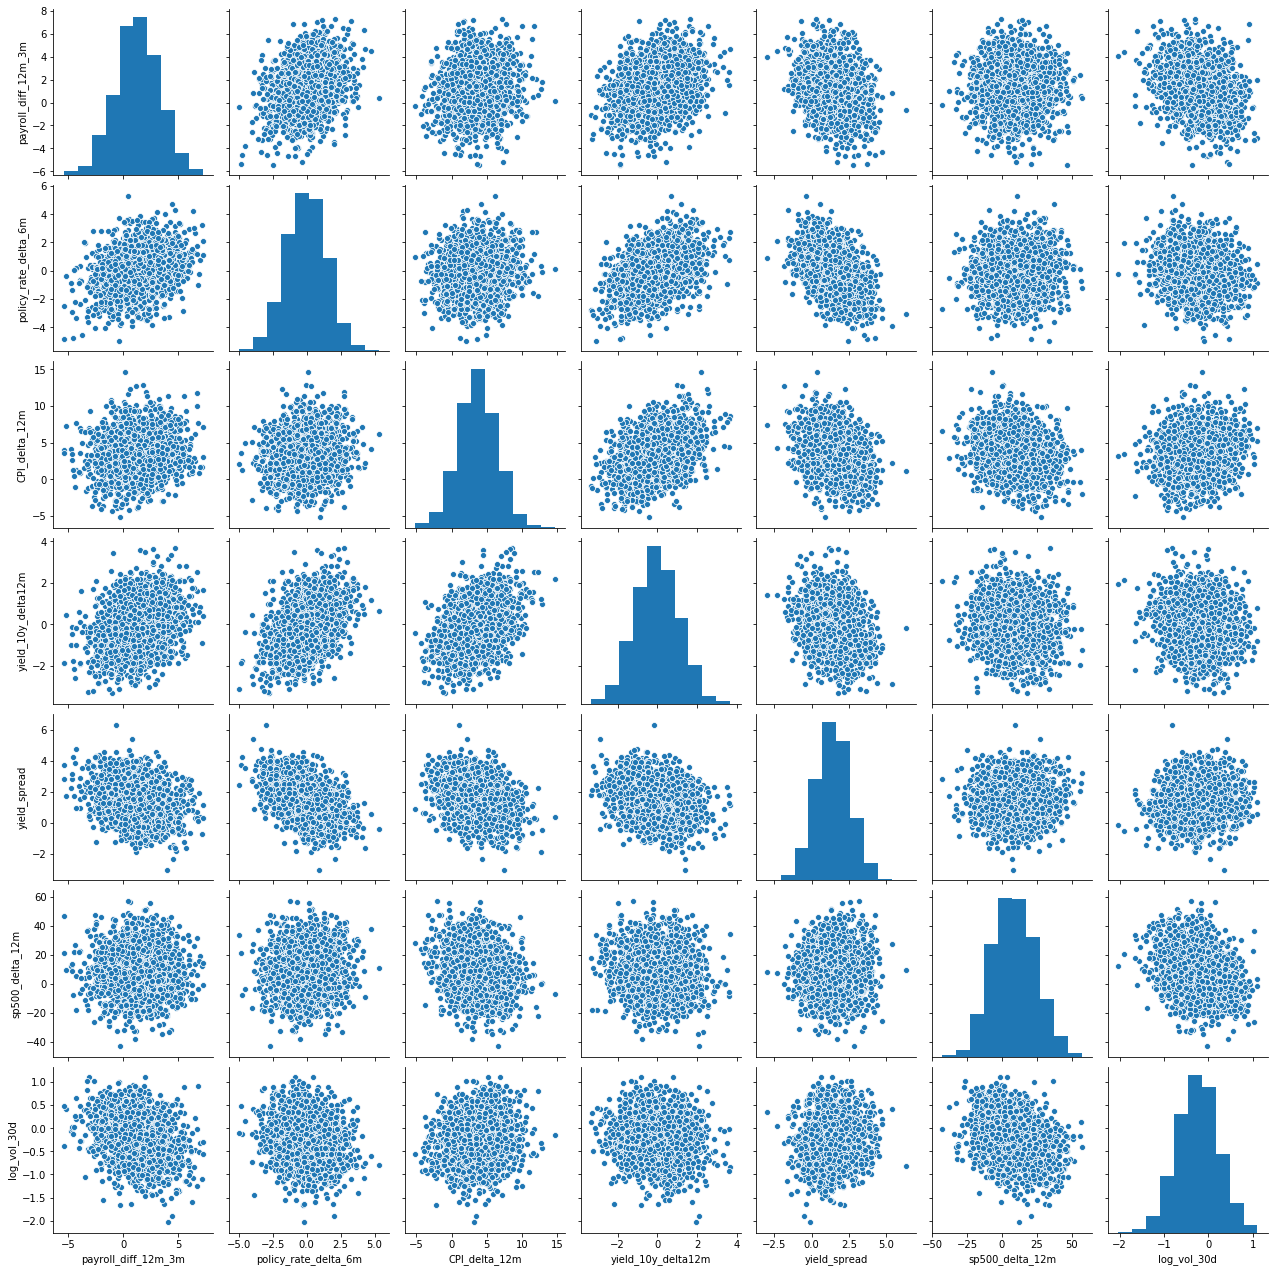

In [250]:
sns.pairplot(multivariate_data)

- Conclusion: The simulated data doesn't look similar to the original data distribution
- so we can't not use the Multivariant Normal method

# Method2: Estimate the Empirical Joint Distribution

In [251]:
from sklearn.neighbors import KernelDensity

In [252]:
# Estimating the empirical joint distribution
kde = KernelDensity(kernel='gaussian', bandwidth=0.15).fit(X.to_numpy())

In [253]:
# Simulate new data set by drawing samples from the empirical distribution
# Simulated data size is 2000
simulated_data = kde.sample(2000)
simulated_data = pd.DataFrame(simulated_data, columns=X.columns)
simulated_data

payroll_diff_12m_3m  policy_rate_delta_6m  CPI_delta_12m  \
0                1.064554              0.509620       1.060298   
1                1.849828              3.345758      13.259996   
2                2.693049              0.628347       5.637853   
3                2.442370             -0.019175       4.645795   
4               -1.529083             -4.622998      10.573469   
...                   ...                   ...            ...   
1995             1.440483              0.128701       2.853791   
1996             1.529861             -0.323019      -0.331738   
1997            -0.355680             -1.817895       2.055456   
1998             1.391343              0.502121       1.613051   
1999             0.355323             -0.131892       3.109352   

      yield_10y_delta12m  yield_spread  sp500_delta_12m   vol_30d  
0               0.018752      0.973719        27.421604  0.643231  
1               1.400314     -1.886371        12.342098  0.765869  
2              -0.794747      2.675179        25.595144  0.740882  
3               0.585234      0.046949         7.631349  0.769675  
4               0.605788      2.799066        -3.570591  1.014884  
...                  ...           ...              ...       ...  
1995           -1.591458      1.771542         1.862141  0.790916  
1996           -0.769654      2.030864        10.684735  0.616945  
1997           -1.051322      2.862473       -13.234082  0.741421  
1998            0.383989     -0.494849        14.173355  0.693990  
1999           -0.235214      3.743741        14.993688  0.763166  

[2000 rows x 7 columns]

In [254]:
X.columns

Index(['payroll_diff_12m_3m', 'policy_rate_delta_6m', 'CPI_delta_12m',
       'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d'],
      dtype='object')

### Plot simulated data & original data distribution

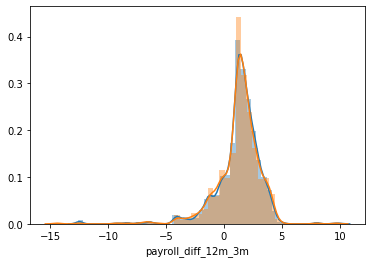

In [256]:
sns.distplot(simulated_data['payroll_diff_12m_3m'])
sns.distplot(X['payroll_diff_12m_3m'])

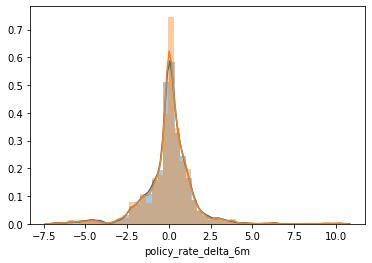

In [257]:
sns.distplot(simulated_data['policy_rate_delta_6m'])
sns.distplot(X['policy_rate_delta_6m'])

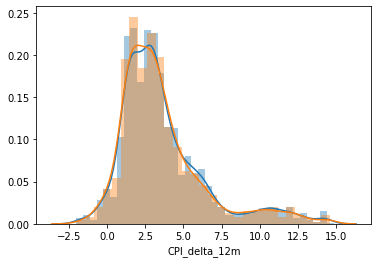

In [258]:
sns.distplot(simulated_data['CPI_delta_12m'])
sns.distplot(X['CPI_delta_12m'])

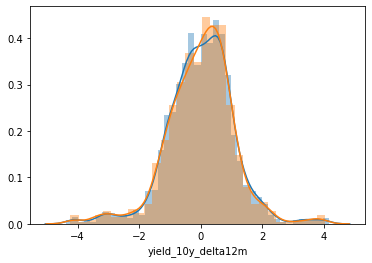

In [259]:
sns.distplot(simulated_data['yield_10y_delta12m'])
sns.distplot(X['yield_10y_delta12m'])

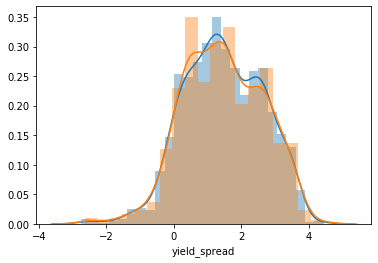

In [260]:
sns.distplot(simulated_data['yield_spread'])
sns.distplot(X['yield_spread'])

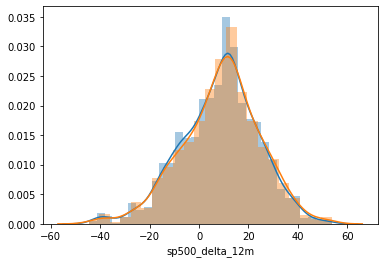

In [261]:
sns.distplot(simulated_data['sp500_delta_12m'])
sns.distplot(X['sp500_delta_12m'])

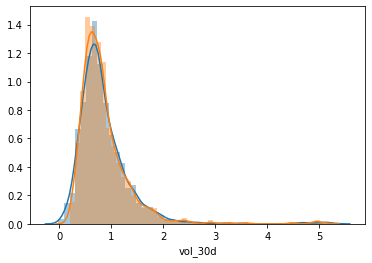

In [262]:
sns.distplot(simulated_data['vol_30d'])
sns.distplot(X['vol_30d'])

### Plot pair wise relationship

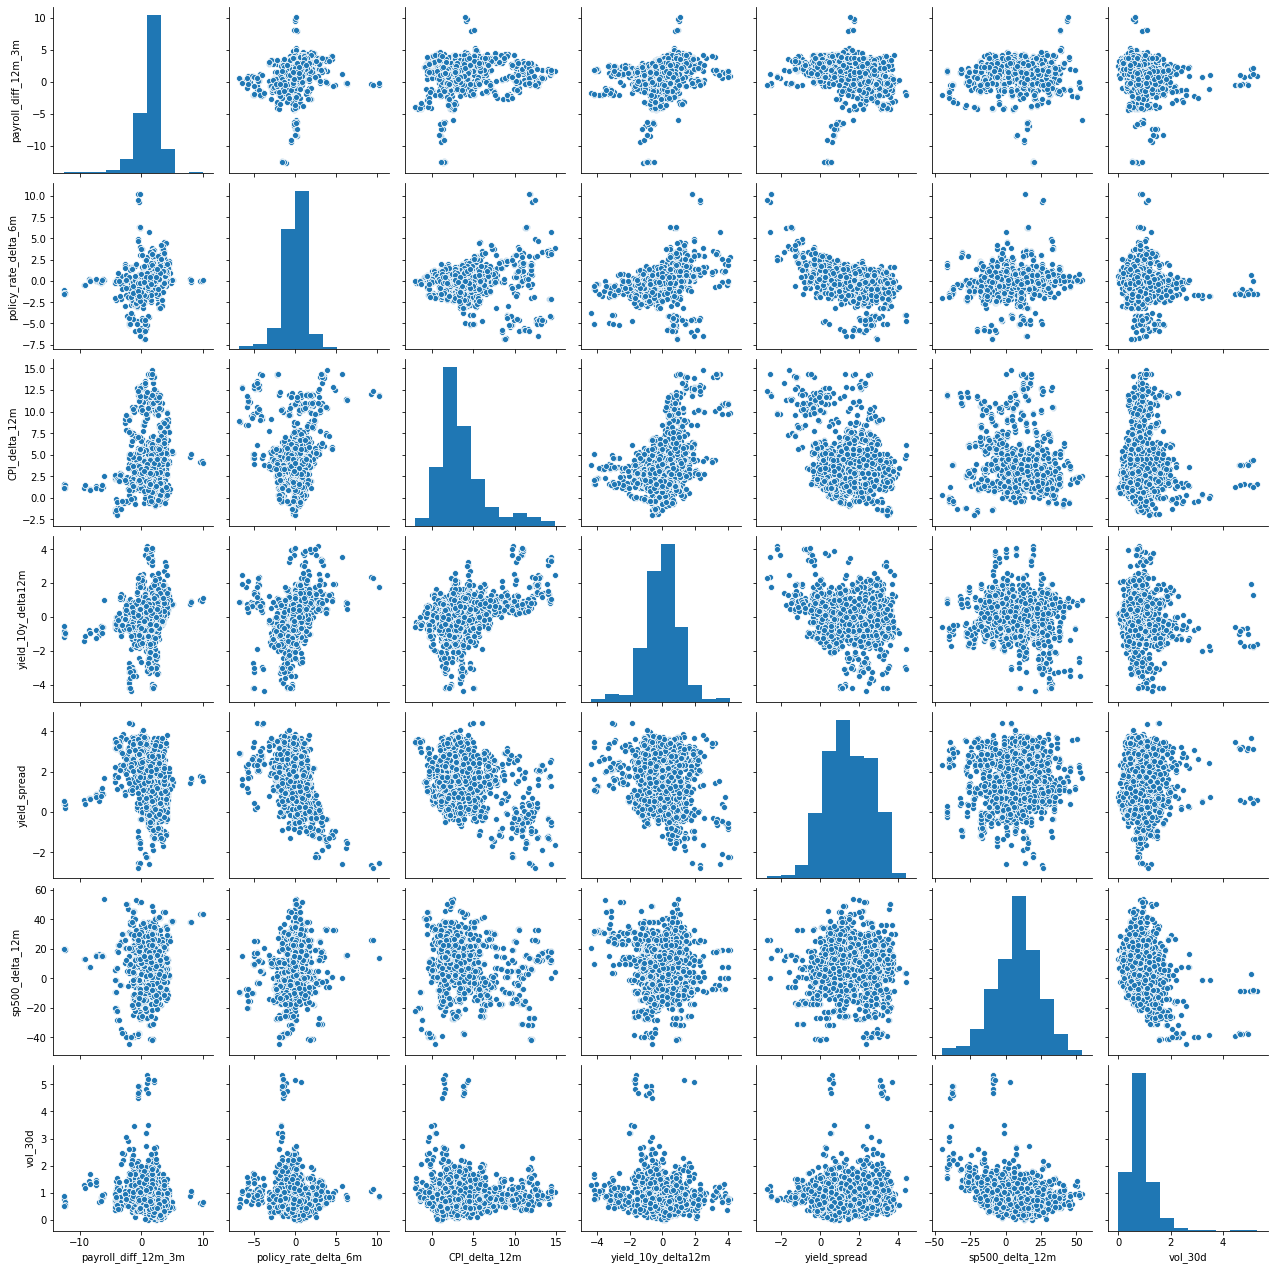

In [263]:
sns.pairplot(simulated_data)

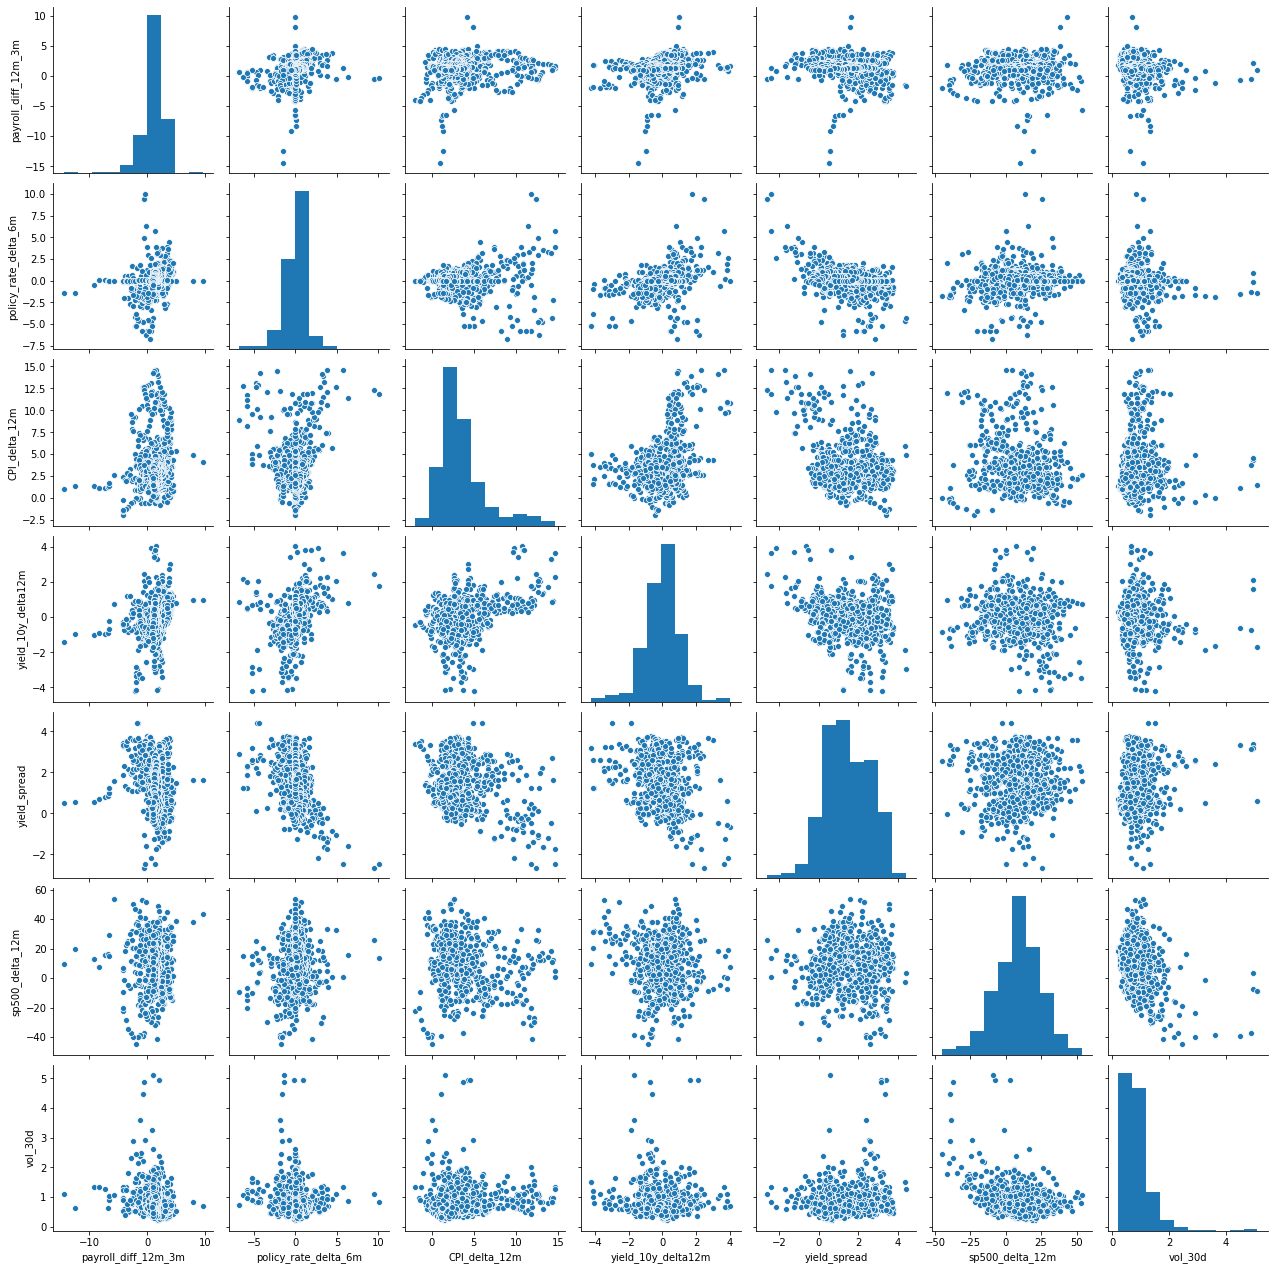

In [264]:
sns.pairplot(X)

- We can see that the simulated data distribution is very close to the original data distribution
- The pairwise relationship in the simulated data set is close to original as well
- We can say the kernel estimation does a good job in estimating the joint distribution

# Simulate X & Y by estimating joint density between X & Y

In [265]:
# For model 3, features used are:
all_cols = ['payroll_diff_12m_3m',
            'policy_rate_delta_6m',
            'CPI_delta_12m',
            'yield_10y_delta12m',
            'yield_spread',
            'sp500_delta_12m',
            'vol_30d',
            'recession_3m'
            ]
Xy = all_df[all_cols].copy().dropna()
Xy

payroll_diff_12m_3m  policy_rate_delta_6m  CPI_delta_12m  \
date                                                                   
1955-01-01            -1.077372                  0.59      -0.631032   
1955-02-01            -0.412915                  0.07      -0.629863   
1955-03-01             0.358496                  0.28      -0.519866   
1955-04-01             0.654377                  0.58      -0.260611   
1955-05-01             1.410951                  0.60      -0.594133   
...                         ...                   ...            ...   
2021-09-01             2.902938                  0.01       5.389907   
2021-10-01             2.919198                  0.01       6.236941   
2021-11-01             3.045375                  0.02       6.828372   
2021-12-01             3.434245                  0.00       7.096542   
2022-01-01             3.528676                 -0.02       7.525934   

            yield_10y_delta12m  yield_spread  sp500_delta_12m   vol_30d  \
date                                                                      
1955-01-01                0.13          1.39        40.452458  1.029941   
1955-02-01                0.18          1.48        40.573609  0.727032   
1955-03-01                0.31          1.40        35.783226  0.936469   
1955-04-01                0.46          1.16        34.324129  0.572632   
1955-05-01                0.39          1.31        29.873241  0.593385   
...                        ...           ...              ...       ...   
2021-09-01                0.69          1.33        28.086234  0.756364   
2021-10-01                0.79          1.53        40.839030  0.870059   
2021-11-01                0.69          1.51        26.103444  0.729942   
2021-12-01                0.54          1.41        26.892739  1.112502   
2022-01-01                0.68          1.61        21.573991  1.122077   

            recession_3m  
date                      
1955-01-01           0.0  
1955-02-01           0.0  
1955-03-01           0.0  
1955-04-01           0.0  
1955-05-01           0.0  
...                  ...  
2021-09-01           1.0  
2021-10-01           1.0  
2021-11-01           0.0  
2021-12-01           0.0  
2022-01-01           0.0  

[805 rows x 8 columns]

In [266]:
# Estimating the empirical joint distribution
kde_xy = KernelDensity(kernel='gaussian', bandwidth=0.15).fit(Xy.to_numpy())

In [302]:
# Simulate new data set by drawing samples from the empirical distribution
# Simulated data size is 2000
simulated_xy = kde_xy.sample(2000)
simulated_xy = pd.DataFrame(simulated_xy, columns=Xy.columns)
simulated_xy

payroll_diff_12m_3m  policy_rate_delta_6m  CPI_delta_12m  \
0                1.632881              0.051918       1.941297   
1                1.275086             -0.800256       1.335291   
2                1.995712             -0.421276       3.384325   
3                2.915522              0.301795       5.483564   
4                1.248171              0.165968       1.576431   
...                   ...                   ...            ...   
1995             0.087390             -0.270302       0.976372   
1996            -1.040450             -0.091164       1.722956   
1997             1.444875              0.725331       3.707416   
1998             2.404185              0.871565       2.944324   
1999             4.000018              0.690279       0.240836   

      yield_10y_delta12m  yield_spread  sp500_delta_12m   vol_30d  \
0               0.224855      1.063028        21.113155  1.286303   
1              -2.735052      1.923565        23.235973  0.987062   
2              -1.866807      3.219530        14.401753  0.737642   
3               0.891785      1.273411        28.087728  0.763120   
4              -0.424683      1.037910        13.101557  0.803314   
...                  ...           ...              ...       ...   
1995           -0.894721      2.434029        14.047018  0.560686   
1996           -0.767279      2.584178       -19.162134  2.397401   
1997            0.791677      0.548363         6.411178  0.621466   
1998           -0.903311      0.727457        22.703445  0.965743   
1999            0.197890      0.433869        23.234167  0.794996   

      recession_3m  
0         0.223854  
1         0.893521  
2         1.000080  
3         0.926382  
4         1.052109  
...            ...  
1995      0.216330  
1996      0.804957  
1997     -0.110334  
1998      0.840984  
1999      1.047837  

[2000 rows x 8 columns]

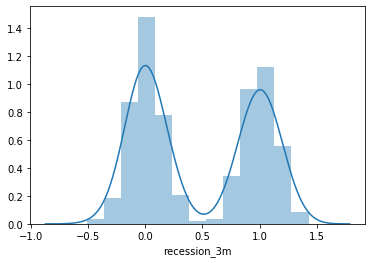

In [303]:
sns.distplot(simulated_xy['recession_3m'])

In [271]:
# We can see from the simulated y variable, it has two sub-distribution centered at 0 and 1 respectively
# Transform them to 0, 1 indicator: 0 if <0.5 and 1 if > 0.5
simulated_xy['transformed_recession_3m'] = np.where(simulated_xy['recession_3m'] <= 0.5, 0, 1)
simulated_xy

payroll_diff_12m_3m  policy_rate_delta_6m  CPI_delta_12m  \
0               -3.779548              0.390338       2.063809   
1               -7.373611              0.076696       1.097962   
2                1.722878              0.272352      -0.133841   
3               -3.400167             -0.151641       3.137342   
4                0.339686             -0.161811       2.267085   
...                   ...                   ...            ...   
1995            -0.176262             -0.204690       1.766140   
1996             4.401626              0.847412       0.764354   
1997             3.318771             -1.384580       2.272634   
1998             1.452244             -1.560711       1.969536   
1999             3.099925              0.782434      10.367490   

      yield_10y_delta12m  yield_spread  sp500_delta_12m   vol_30d  \
0              -0.368338      1.422081        17.938516  0.414604   
1              -0.885949      0.405975        15.521792  1.249382   
2              -0.733286      1.818910        10.659834  0.710393   
3               1.402485      3.450852        23.651913  0.511786   
4               0.202294      3.470979        20.331363  0.620223   
...                  ...           ...              ...       ...   
1995           -1.556945      2.590506        -9.753903  0.955365   
1996            1.343945      1.063864        28.317761  0.250519   
1997           -0.313408      0.814625         3.139698  0.674988   
1998           -2.315430      1.501153        30.773322  0.811067   
1999            1.258689     -0.198702         5.249689  0.734741   

      recession_3m  transformed_recession_3m  
0        -0.160022                         0  
1         0.849435                         1  
2         1.240637                         1  
3        -0.010868                         0  
4         0.011148                         0  
...            ...                       ...  
1995     -0.307886                         0  
1996      1.235171                         1  
1997      1.027425                         1  
1998      0.718957                         1  
1999      0.891098                         1  

[2000 rows x 9 columns]

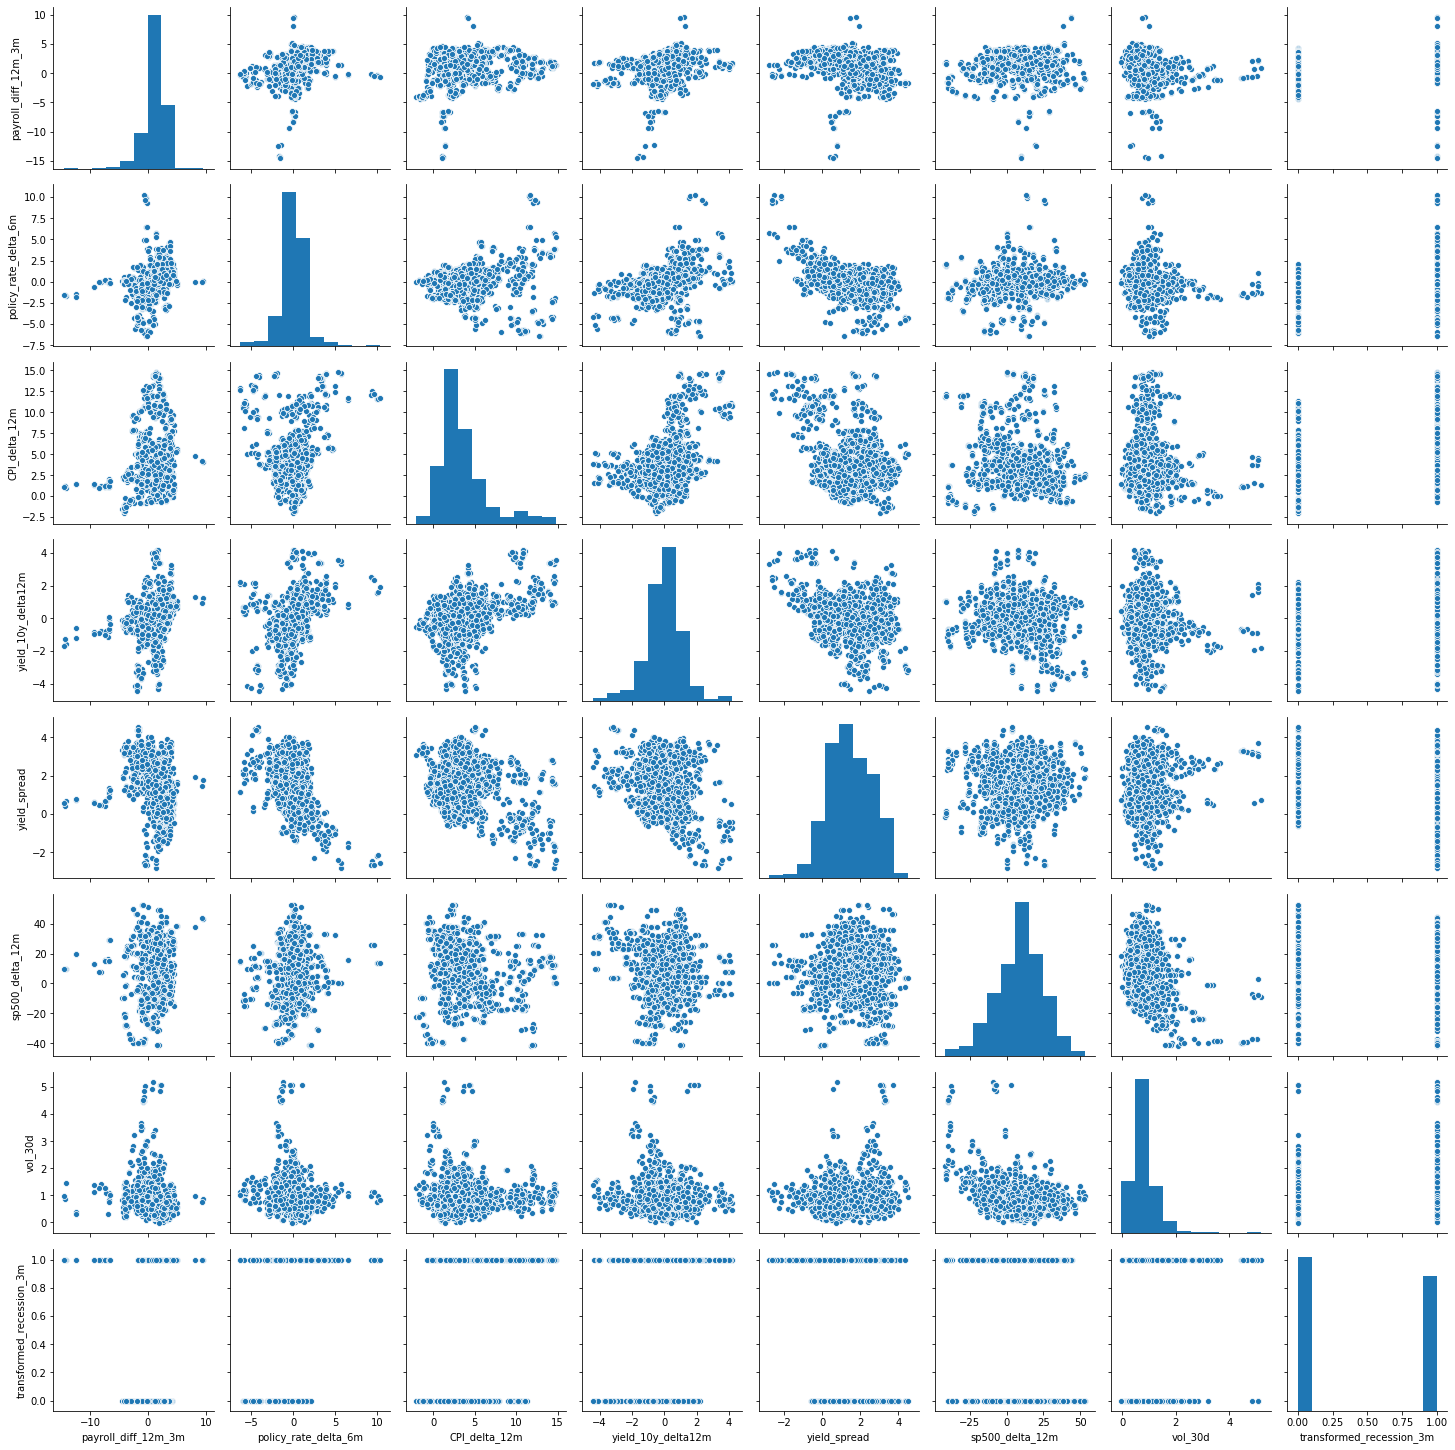

In [299]:
sns.pairplot(simulated_xy[['payroll_diff_12m_3m',
                          'policy_rate_delta_6m',
                          'CPI_delta_12m',
                          'yield_10y_delta12m',
                          'yield_spread',
                          'sp500_delta_12m',
                          'vol_30d',
                          'transformed_recession_3m']])

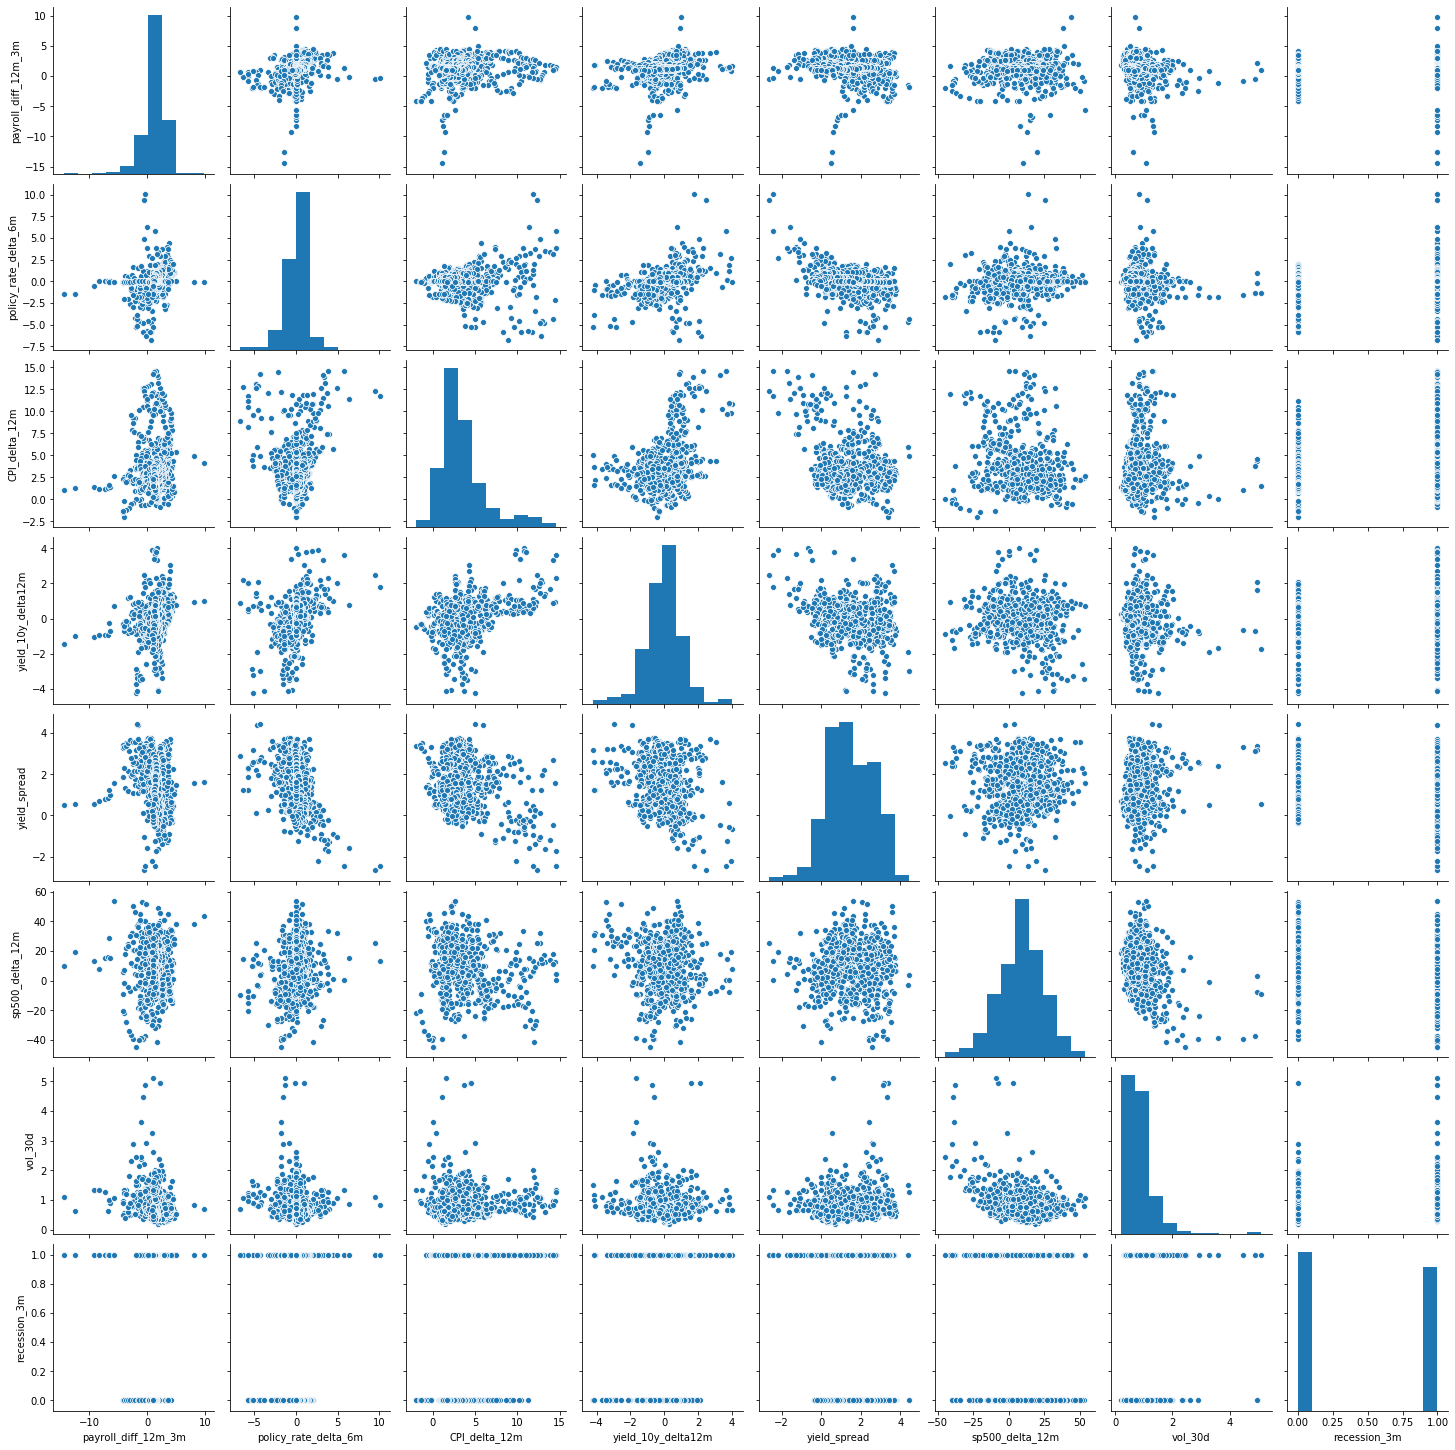

In [297]:
sns.pairplot(Xy)

### Read the SVC Model

In [298]:
import pickle

fold_path = f'data_folder/experiments_out_sample_new/svc/exp_1342.0/fold_4'
filename = f'{fold_path}/model.pkl'

with open(filename, 'rb') as f:
    svc_model = pickle.load(f)

# Show model parameters
svc_model.pipeline.get_params()

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('classifier',
   SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False))],
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'classifier': SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 2.8,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_s

### Test on the model performance
- Use our SVC model to predict with the simulated features
- Compared predicted y with simulated y

In [301]:
y_data = svc_model.get_prediction(simulated_xy[['payroll_diff_12m_3m',
                                              'policy_rate_delta_6m',
                                              'CPI_delta_12m',
                                              'yield_10y_delta12m',
                                              'yield_spread',
                                              'sp500_delta_12m',
                                              'vol_30d']],
                                       simulated_xy['transformed_recession_3m'].reset_index()
                                       )
y_data

index  transformed_recession_3m  y_pred    prob_0    prob_1
0         0                         0     0.0  0.855136  0.144864
1         1                         1     1.0  0.019622  0.980378
2         2                         1     1.0  0.024376  0.975624
3         3                         0     0.0  0.902957  0.097043
4         4                         0     0.0  0.995587  0.004413
...     ...                       ...     ...       ...       ...
1995   1995                         0     0.0  0.555498  0.444502
1996   1996                         1     1.0  0.079894  0.920106
1997   1997                         1     1.0  0.008050  0.991950
1998   1998                         1     1.0  0.100743  0.899257
1999   1999                         1     1.0  0.000002  0.999998

[2000 rows x 5 columns]

In [300]:
import experiment

metrics_info = experiment.get_model_metrics(y_data['transformed_recession_3m'], y_data['y_pred'])
metrics_info

{'accuracy': 0.8585,
 'balanced_accuracy': 0.855255956415857,
 'average_precision': 0.8011015667071597,
 'f1_binary': 0.8418110676355506,
 'f1_micro': 0.8585,
 'f1_macro': 0.8569073429539128,
 'f1_weighted': 0.8578886008496063,
 'precision': 0.8817330210772834,
 'recall': 0.8053475935828877,
 'roc_auc_micro': 0.8552559564158569,
 'roc_auc_macro': 0.8552559564158569,
 'roc_auc_weighted': 0.8552559564158569}

- The model works well on the simulated data as well